In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load dataset

df = pd.read_csv('train.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
# Keep Data We Need
df = df[['Order Date', 'Sales']]

# sort date
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df = df.sort_values('Order Date')


In [14]:
# Create Month Column
df['Month'] = df['Order Date'].dt.to_period('M')

In [15]:

# Total sale per Month
monthly_sales = df.groupby('Month')['Sales'].sum()

In [16]:
# Percentage change month to month

growth = monthly_sales.pct_change()*100

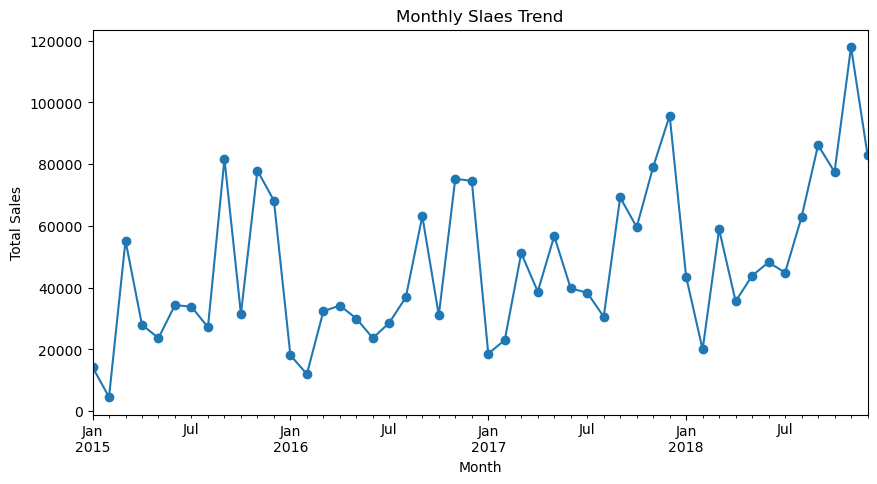

In [17]:
#Sales trend

monthly_sales.plot(
    kind = 'line',
    marker = 'o',
    figsize =(10,5),
    title = 'Monthly Slaes Trend'
)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

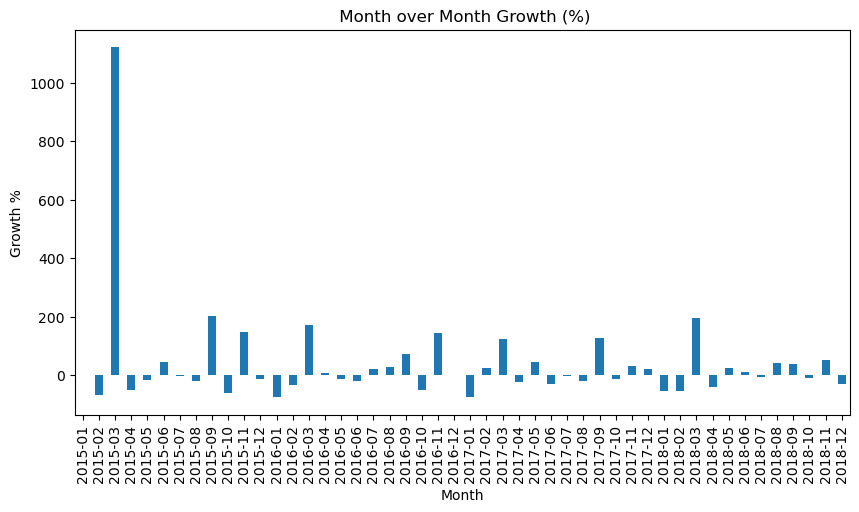

In [18]:
#Growth bar chart
growth.plot(
    kind = 'bar',
    figsize = (10,5),
    title = ' Month over Month Growth (%)'
)

plt.xlabel("Month")
plt.ylabel("Growth %")
plt.show()